In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

We're applying the same method illustrated in Mandelbrot's "The Misbehaviour Of Markets" (2008, Mathematical appendix).

The goal is to show how unlikely a real market crash is according to a normal distribution. This in turn provides evidence of the uselessness of using a normal distribution to quantify risk.

First some code to import prices for individual stocks from Yahoo.

In [2]:
 def import_stock_data(tickers, start = '2010-1-1'):
    """
    Imports data of a list of stocks from a certain date.
    
    Parameters
    ----------
    tickers : list of str
        List of tickers for stock prices
    start : str
        Date in yyyy-MM-dd format
        
    Returns
    -------
    pandas.DataFrame
    """
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        #data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

Import stock data from yahoo.

In [3]:
stock = ['AAPL', 'AMZN']
data = import_stock_data(stock)
#data = pd.DataFrame()
#data[stock] = pd.read_csv('./spx.csv')['Close/Last']

In [14]:
data.head()

,AAPL,AMZN
Date,,
2010-01-04,6.526021,6.6950
2010-01-05,6.537304,6.7345
2010-01-06,6.433318,6.6125
2010-01-07,6.421426,6.5000
2010-01-08,6.464117,6.6760


Plot stock price.

<AxesSubplot: xlabel='Date'>

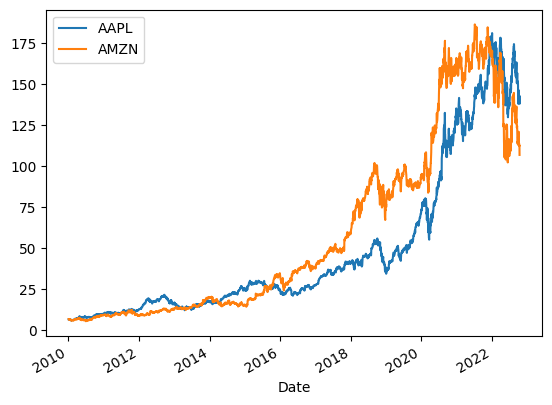

In [15]:
data[stock].plot()

Compute logarithm of prices and plot daily changes. 

<AxesSubplot: xlabel='Date'>

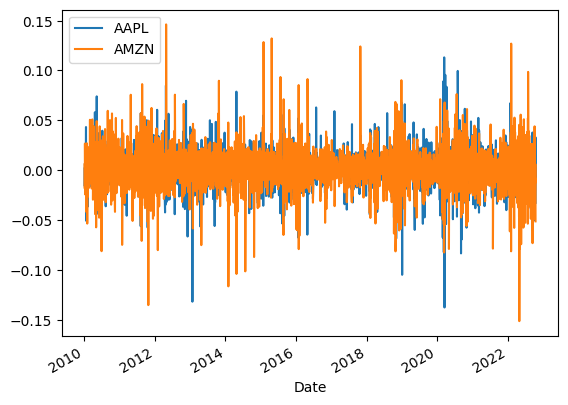

In [16]:
log_data = np.log(data[stock])
log_data_diff = log_data.diff()
log_data_diff.plot()

Compute mean.

In [17]:
mean = log_data_diff.mean()
mean

AAPL    0.000949
AMZN    0.000861
dtype: float64

Compute variance (as if it would fit the bell curve).

In [18]:
var = log_data_diff.var()
var

AAPL    0.000322
AMZN    0.000422
dtype: float64

Compute standard deviation.

In [19]:
std = log_data_diff.std()
std

AAPL    0.017955
AMZN    0.020537
dtype: float64

Find number of standard deviations from the mean for each day (z-score).

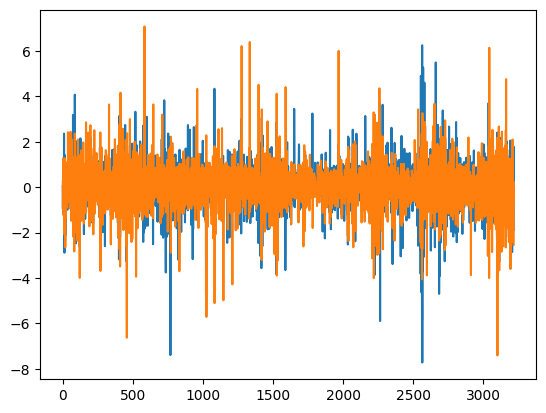

In [25]:
#zscores = (log_data_diff - mean) / std
zscores = st.zscore(log_data_diff.dropna().to_numpy())
plt.plot(zscores)

Find crashes (events with absolute high z-score, but in the negative).

In [28]:
crashes = pd.DataFrame() 
crashes[stock] = zscores[stock][zscores < -5]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Find probability of each crash. That is, getting a daily change as extreme as those in the data. We're considering those at least 5 standard deviations apart.

In [22]:
zscores_prob = pd.DataFrame()
zscores_prob[stock] = st.norm(0, 1).cdf(-np.absolute(crashes)) * 2
for s in stock:
    plt.scatter(crashes[s], zscores_prob[s]*100) # percentage

ValueError: Columns must be same length as key

If price changes really did follow a normal distributions, such crashes would be almost impossible (even considering the most probable, that's still a 0.00003% probability of such a crash).